<a href="https://colab.research.google.com/github/mediarahan/UTSMachineLearning-AchmadRionov-1103204030/blob/main/Achmad_Rionov_1103204030_UTS_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Library dan Dataset Breast Cancer

In [ ]:
from sklearn import datasets
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

data = datasets.load_breast_cancer()

## Preprocess Data

In [ ]:
# Preprocess the data
scaler = StandardScaler()
X = scaler.fit_transform(data.data)
y = data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Visualisasi Data menggunakan Heatmap

<ipython-input-15-db50b266a834>:16: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)


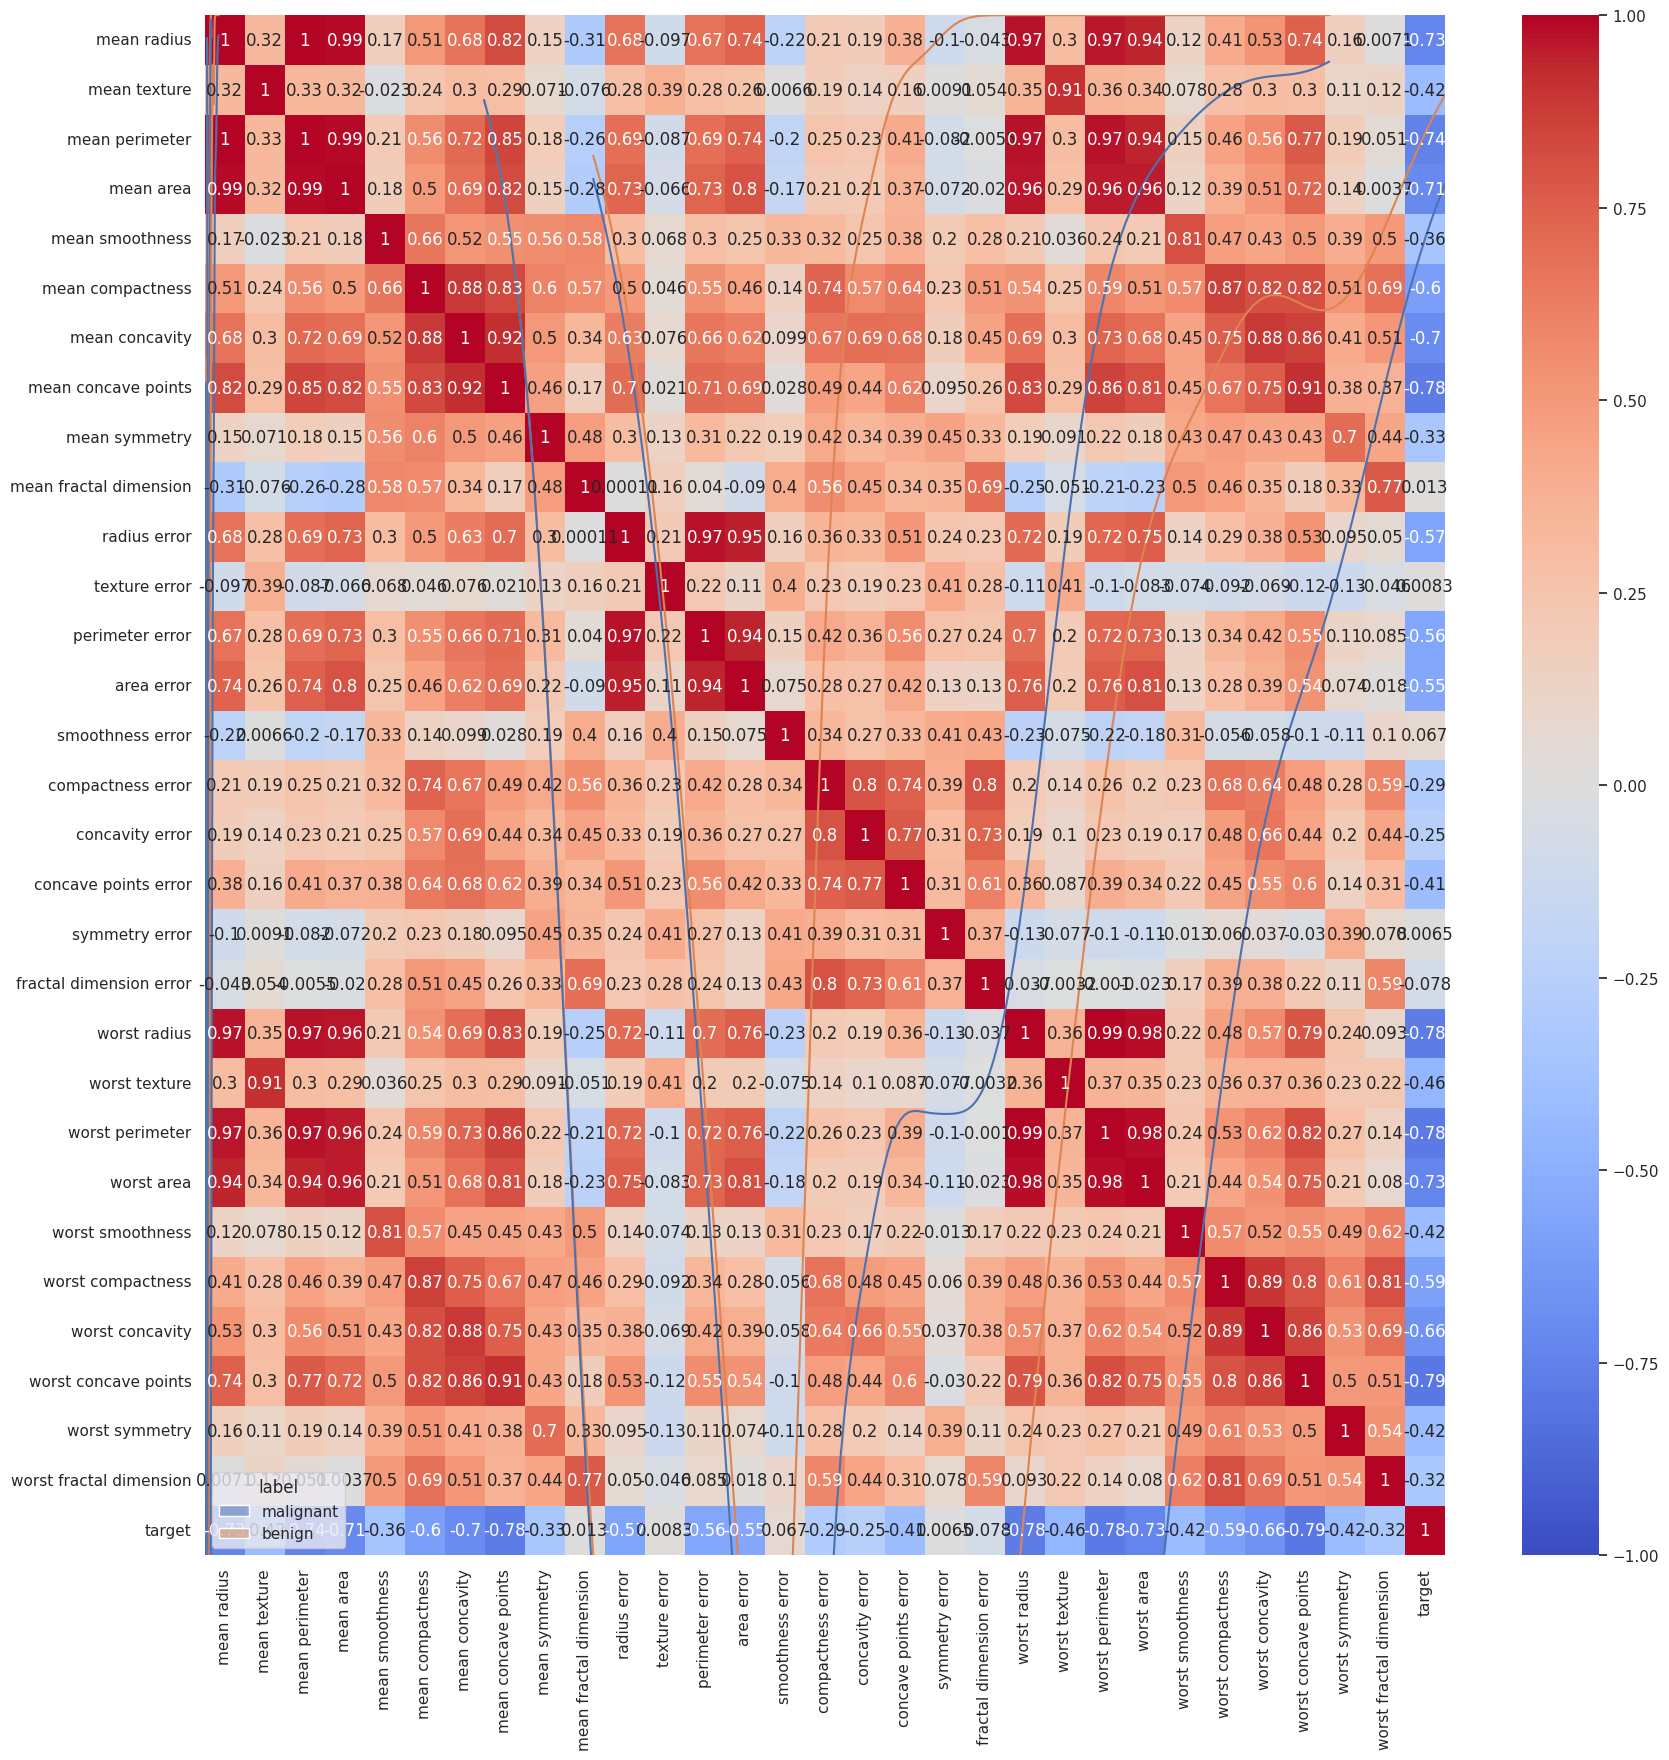

In [ ]:
#Heatmap

df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df['label'] = df['target'].map({0:'malignant', 1:'benign'})

# Plot histogram of the features
sns.set(rc={'figure.figsize':(20,20)})
sns.histplot(df, x="mean radius", hue="label", multiple="stack", kde=True)
sns.histplot(df, x="mean texture", hue="label", multiple="stack", kde=True)
sns.histplot(df, x="mean perimeter", hue="label", multiple="stack", kde=True)
sns.histplot(df, x="mean area", hue="label", multiple="stack", kde=True)
sns.histplot(df, x="mean smoothness", hue="label", multiple="stack", kde=True)
sns.histplot(df, x="mean compactness", hue="label", multiple="stack", kde=True)

# Plot correlation heatmap of the features
sns.set(rc={'figure.figsize':(20,20)})
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

## Visualisasi Data menggunakan Scatter Plot

<Axes: xlabel='mean area', ylabel='mean smoothness'>

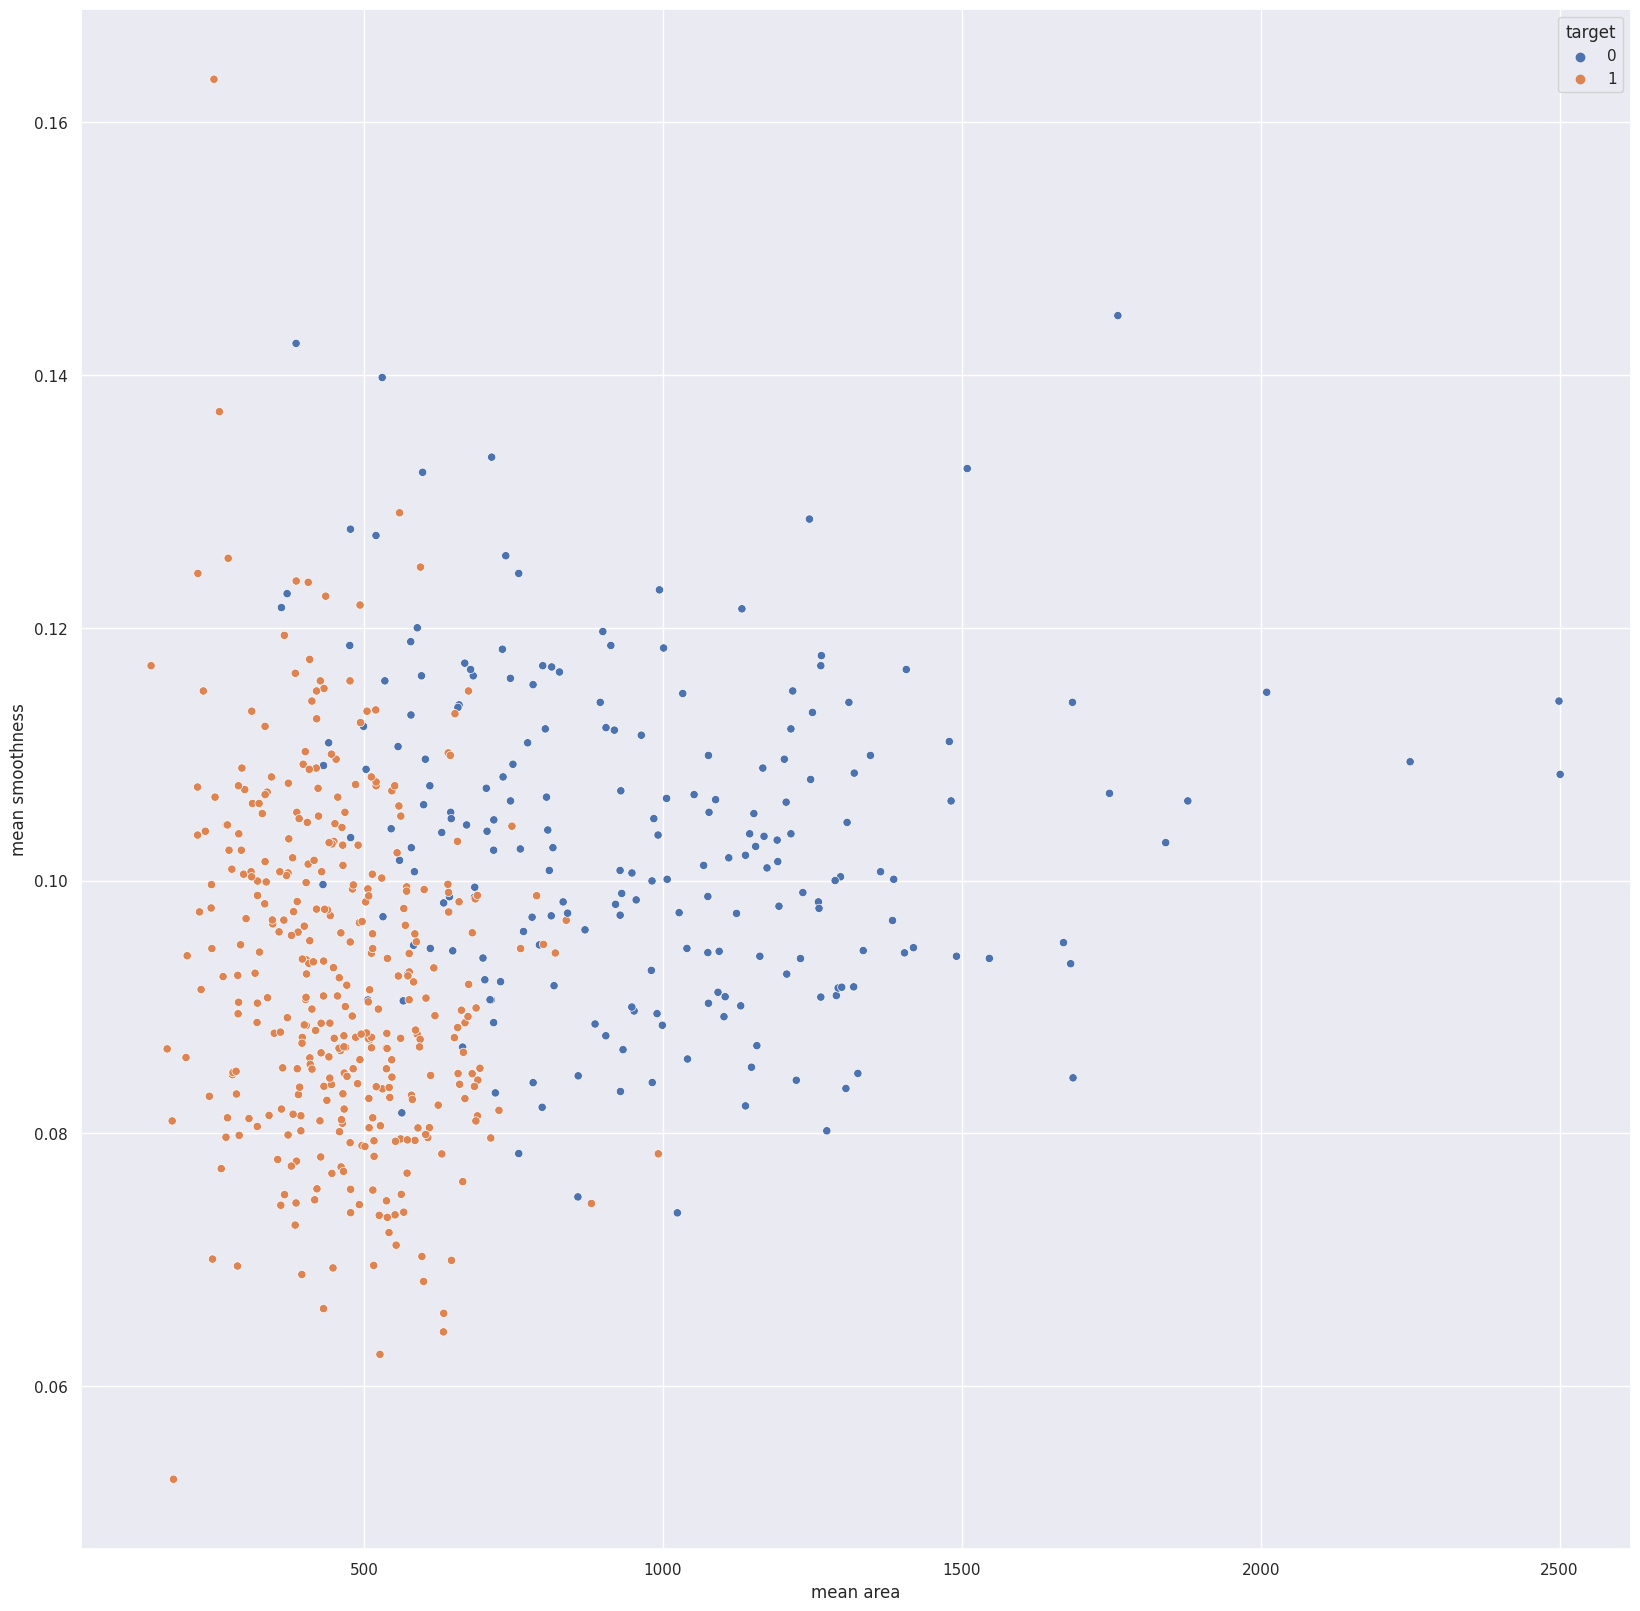

In [ ]:
#Scatter Plot
df = pd.DataFrame(data.data, columns=data.feature_names)

# add target variable to dataframe
df['target'] = pd.Series(data.target)

# plot scatter plot
sns.scatterplot(x='mean area', y='mean smoothness', data=df, hue='target')

## Data Exploration - Decision Tree

Number of nodes in the last tree is: 1 with ccp_alpha: 0.3272984419327777


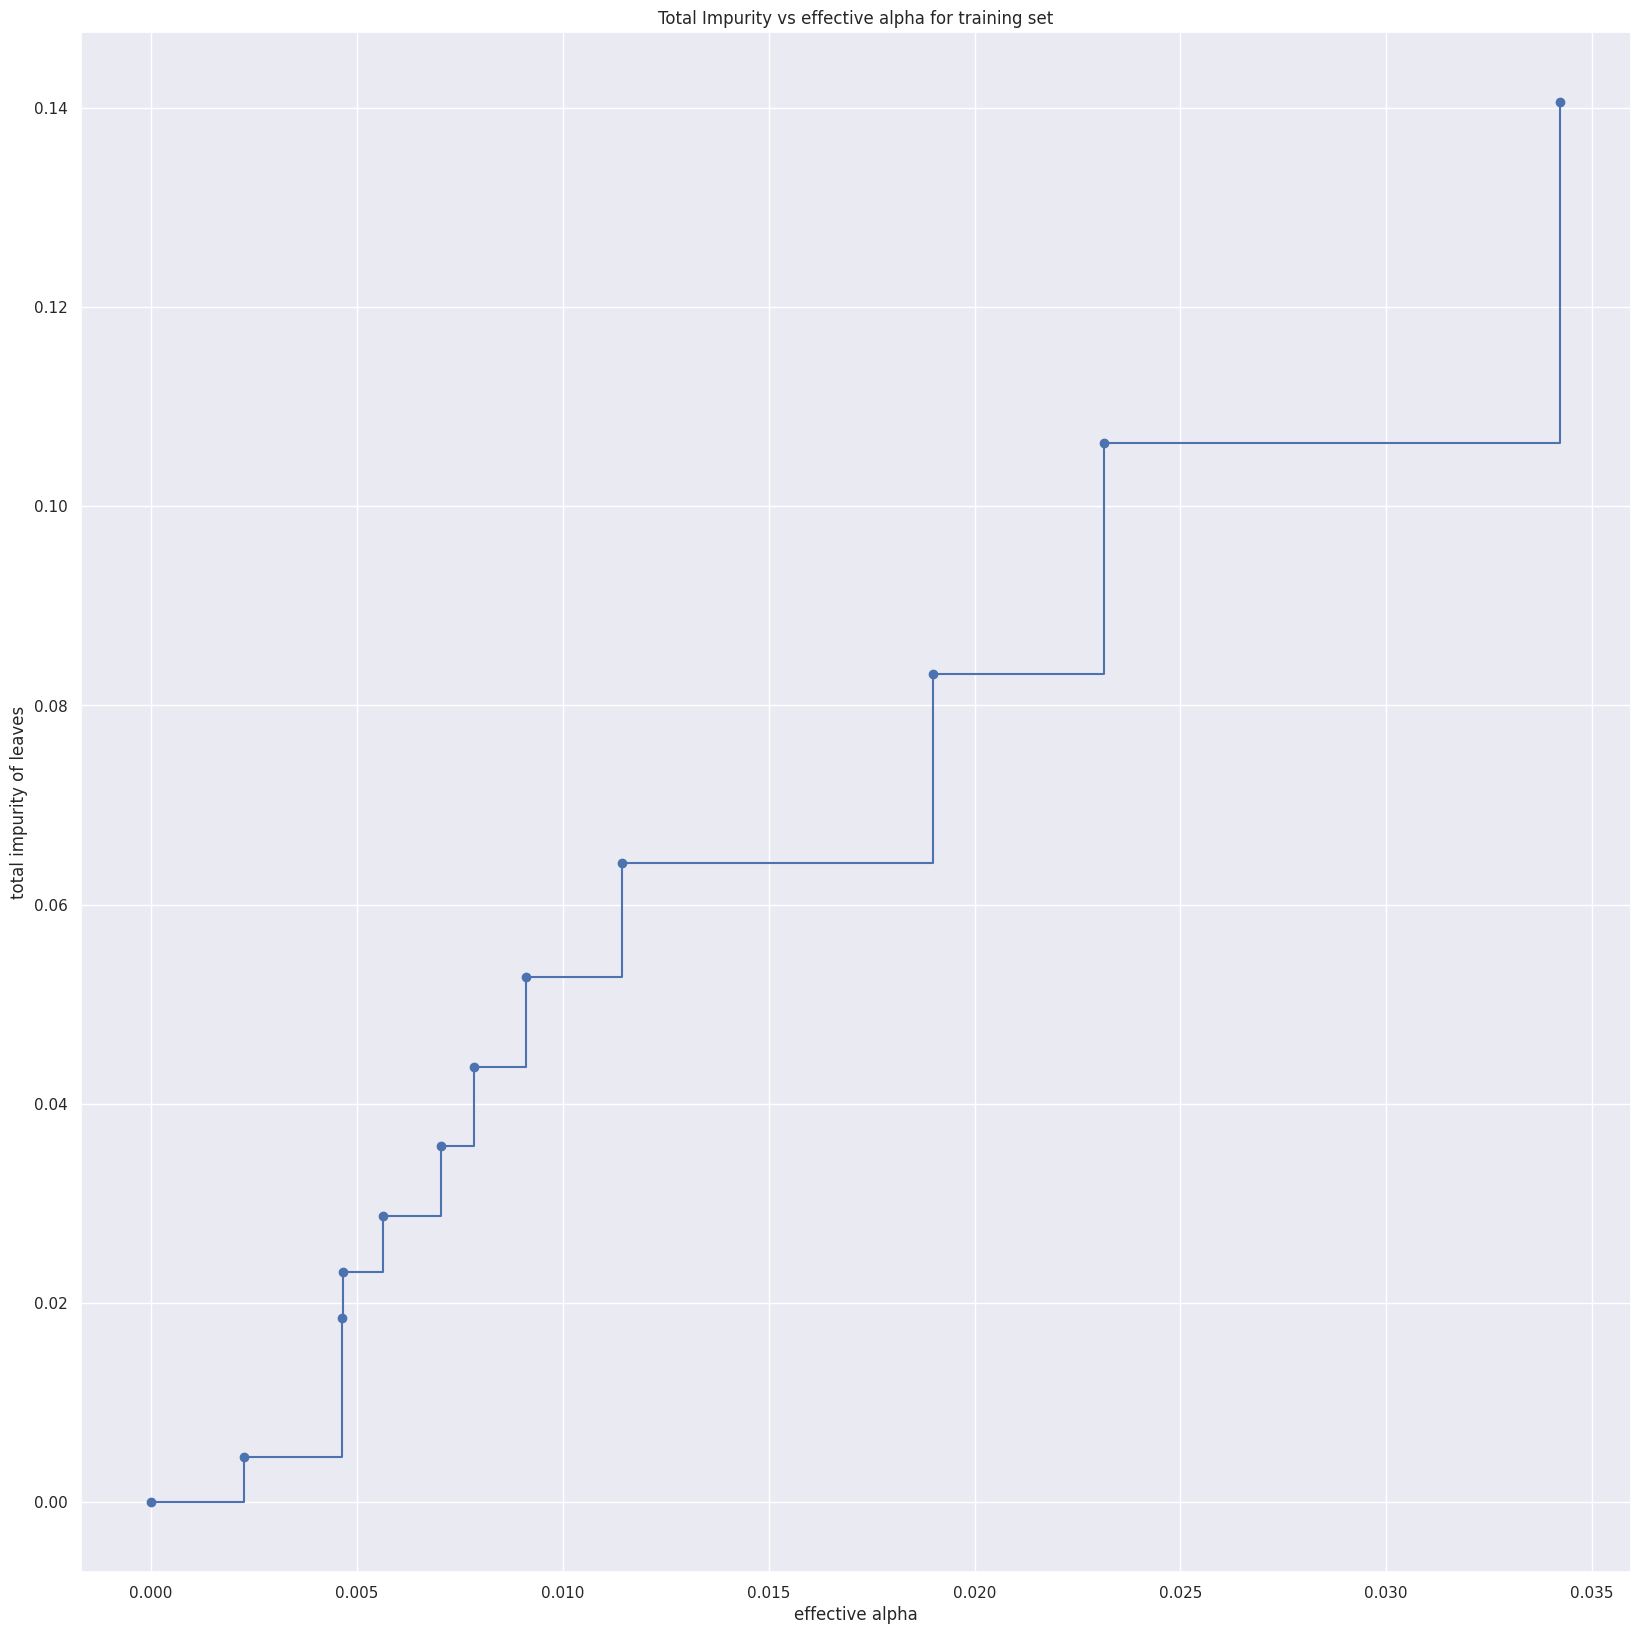

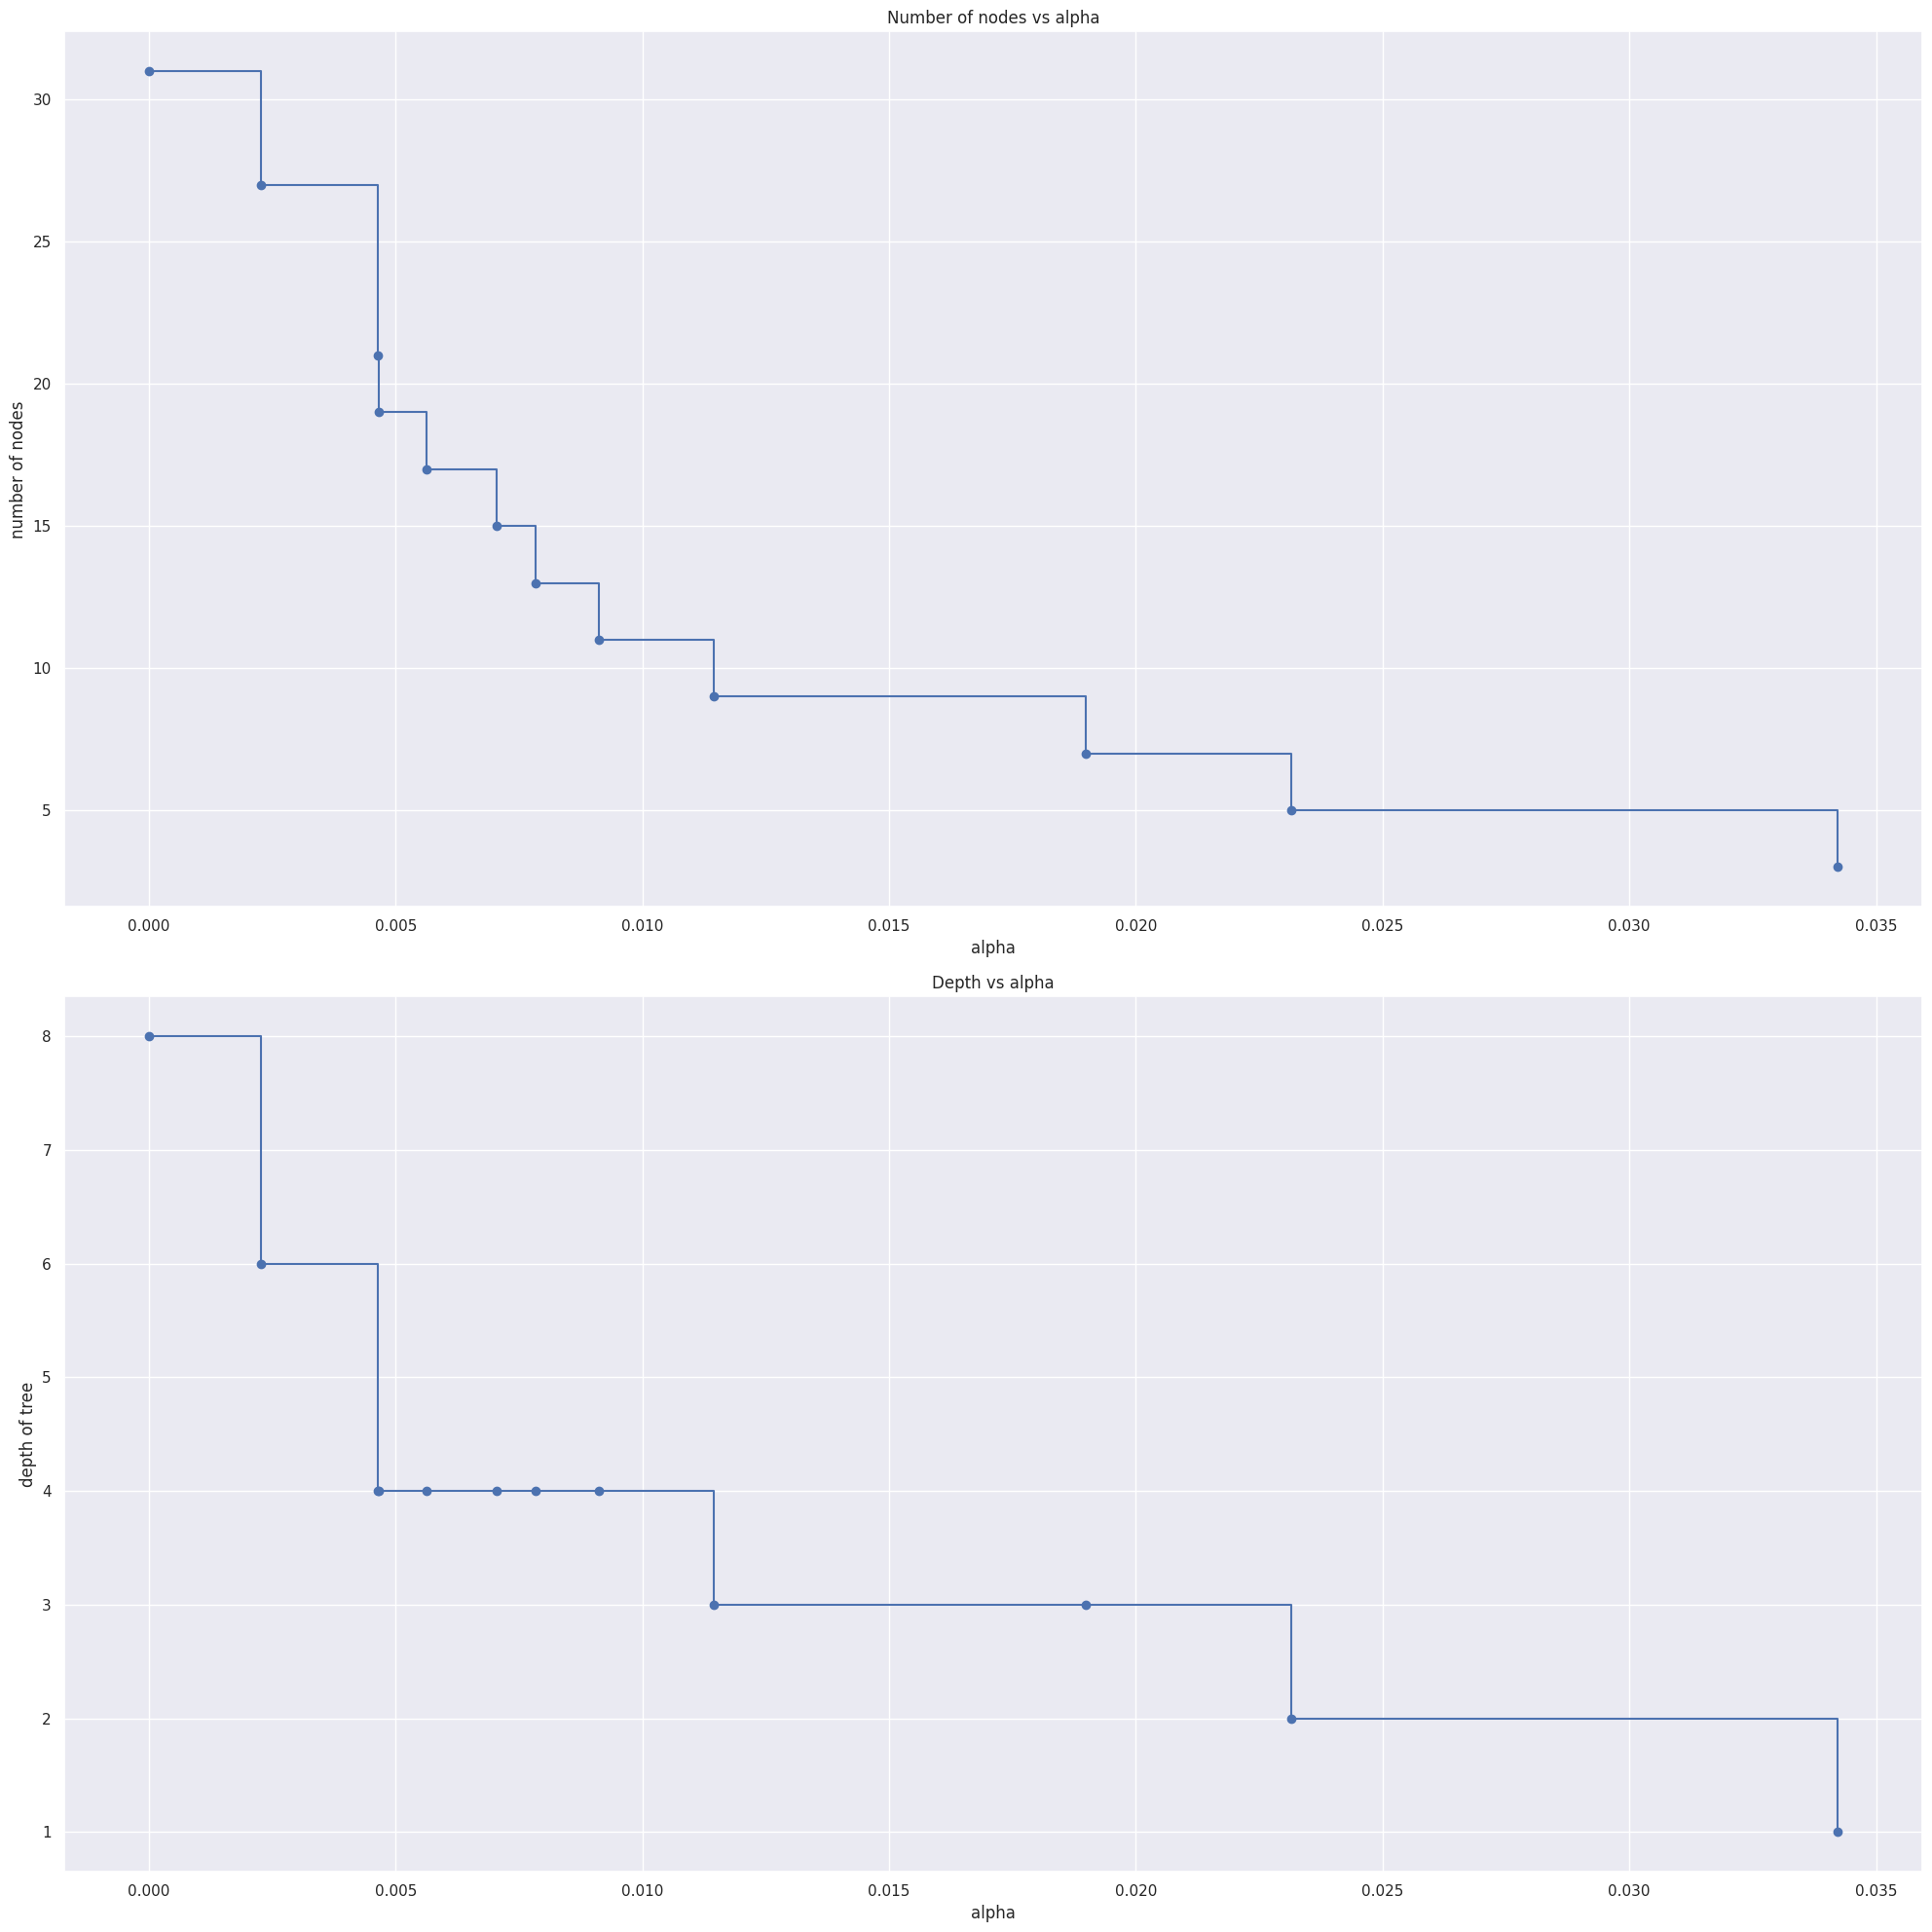

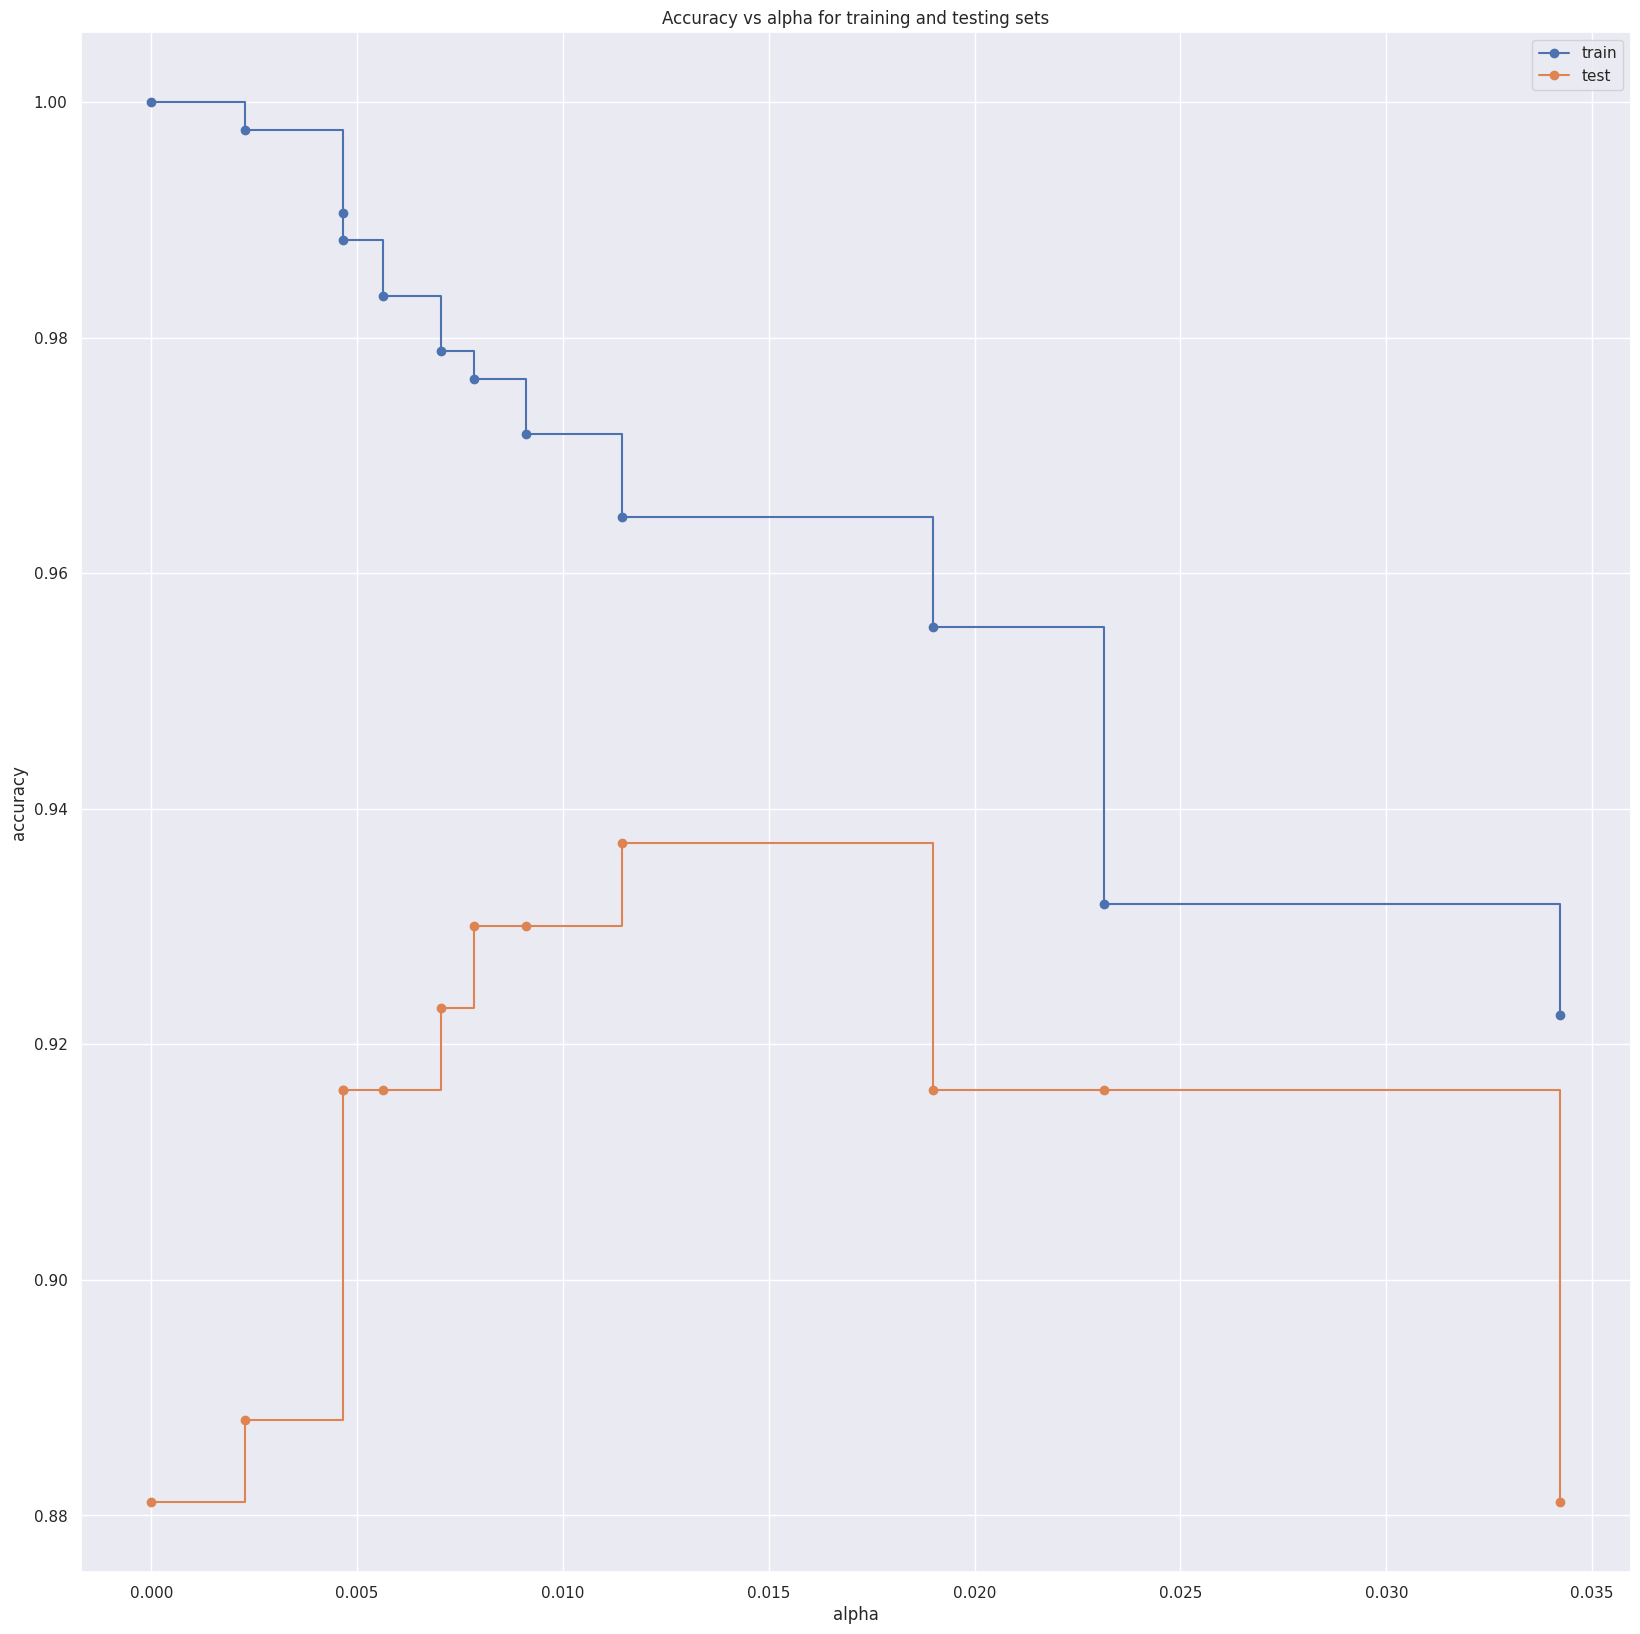

In [ ]:
"""
========================================================
Post pruning decision trees with cost complexity pruning
========================================================
"""

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier

# %%
# Total impurity of leaves vs effective alphas of pruned tree
# ---------------------------------------------------------------
# Minimal cost complexity pruning recursively finds the node with the "weakest
# link". The weakest link is characterized by an effective alpha, where the
# nodes with the smallest effective alpha are pruned first. To get an idea of
# what values of ``ccp_alpha`` could be appropriate, scikit-learn provides
# :func:`DecisionTreeClassifier.cost_complexity_pruning_path` that returns the
# effective alphas and the corresponding total leaf impurities at each step of
# the pruning process. As alpha increases, more of the tree is pruned, which
# increases the total impurity of its leaves.

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# %%
# In the following plot, the maximum effective alpha value is removed, because
# it is the trivial tree with only one node.
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

# %%
# Next, we train a decision tree using the effective alphas. The last value
# in ``ccp_alphas`` is the alpha value that prunes the whole tree,
# leaving the tree, ``clfs[-1]``, with one node.
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

# %%
# For the remainder of this example, we remove the last element in
# ``clfs`` and ``ccp_alphas``, because it is the trivial tree with only one
# node. Here we show that the number of nodes and tree depth decreases as alpha
# increases.
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

# %%
# Accuracy vs alpha for training and testing sets
# ----------------------------------------------------
# When ``ccp_alpha`` is set to zero and keeping the other default parameters
# of :class:`DecisionTreeClassifier`, the tree overfits, leading to
# a 100% training accuracy and 88% testing accuracy. As alpha increases, more
# of the tree is pruned, thus creating a decision tree that generalizes better.
# In this example, setting ``ccp_alpha=0.015`` maximizes the testing accuracy.
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()


## Random Forest

Accuracy on test data: 0.97


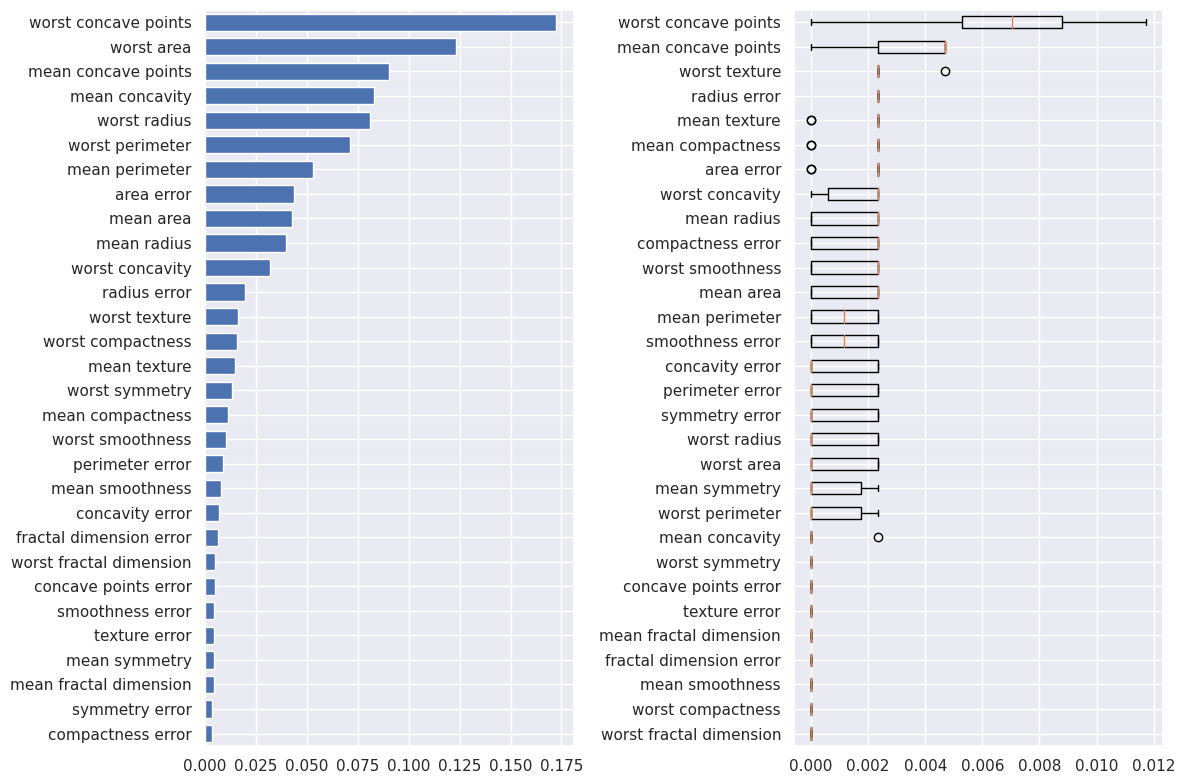

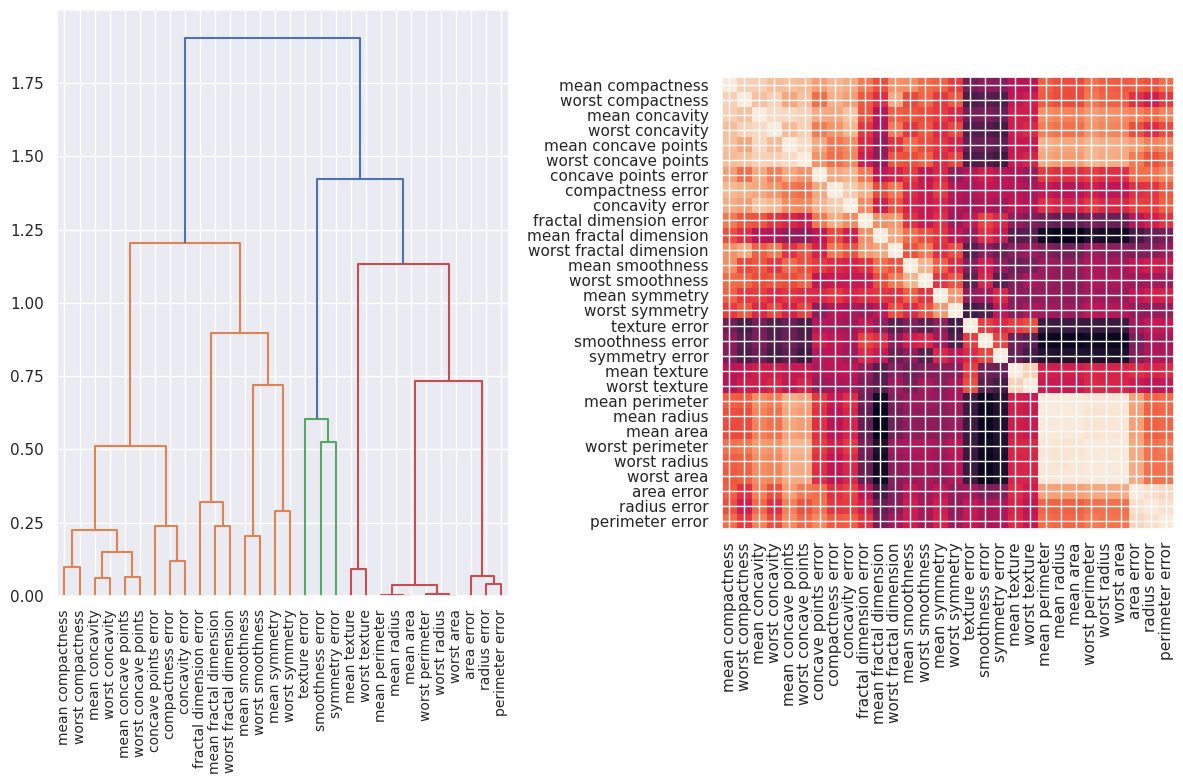

Accuracy on test data with features removed: 0.97


In [ ]:
"""
=================================================================
Permutation Importance with Multicollinear or Correlated Features
=================================================================

In this example, we compute the permutation importance on the Wisconsin
breast cancer dataset using :func:`~sklearn.inspection.permutation_importance`.
The :class:`~sklearn.ensemble.RandomForestClassifier` can easily get about 97%
accuracy on a test dataset. Because this dataset contains multicollinear
features, the permutation importance will show that none of the features are
important. One approach to handling multicollinearity is by performing
hierarchical clustering on the features' Spearman rank-order correlations,
picking a threshold, and keeping a single feature from each cluster.

.. note::
    See also
    :ref:`sphx_glr_auto_examples_inspection_plot_permutation_importance.py`

"""

from collections import defaultdict

import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import spearmanr
from scipy.cluster import hierarchy
from scipy.spatial.distance import squareform

from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

# %%
# Random Forest Feature Importance on Breast Cancer Data
# ------------------------------------------------------
# First, we train a random forest on the breast cancer dataset and evaluate
# its accuracy on a test set:
data = load_breast_cancer()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
print("Accuracy on test data: {:.2f}".format(clf.score(X_test, y_test)))

# %%
# Next, we plot the tree based feature importance and the permutation
# importance. The permutation importance plot shows that permuting a feature
# drops the accuracy by at most `0.012`, which would suggest that none of the
# features are important. This is in contradiction with the high test accuracy
# computed above: some feature must be important. The permutation importance
# is calculated on the training set to show how much the model relies on each
# feature during training.
result = permutation_importance(clf, X_train, y_train, n_repeats=10, random_state=42)
perm_sorted_idx = result.importances_mean.argsort()

tree_importance_sorted_idx = np.argsort(clf.feature_importances_)
tree_indices = np.arange(0, len(clf.feature_importances_)) + 0.5

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
ax1.barh(tree_indices, clf.feature_importances_[tree_importance_sorted_idx], height=0.7)
ax1.set_yticks(tree_indices)
ax1.set_yticklabels(data.feature_names[tree_importance_sorted_idx])
ax1.set_ylim((0, len(clf.feature_importances_)))
ax2.boxplot(
    result.importances[perm_sorted_idx].T,
    vert=False,
    labels=data.feature_names[perm_sorted_idx],
)
fig.tight_layout()
plt.show()

# %%
# Handling Multicollinear Features
# --------------------------------
# When features are collinear, permutating one feature will have little
# effect on the models performance because it can get the same information
# from a correlated feature. One way to handle multicollinear features is by
# performing hierarchical clustering on the Spearman rank-order correlations,
# picking a threshold, and keeping a single feature from each cluster. First,
# we plot a heatmap of the correlated features:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
corr = spearmanr(X).correlation

# Ensure the correlation matrix is symmetric
corr = (corr + corr.T) / 2
np.fill_diagonal(corr, 1)

# We convert the correlation matrix to a distance matrix before performing
# hierarchical clustering using Ward's linkage.
distance_matrix = 1 - np.abs(corr)
dist_linkage = hierarchy.ward(squareform(distance_matrix))
dendro = hierarchy.dendrogram(
    dist_linkage, labels=data.feature_names.tolist(), ax=ax1, leaf_rotation=90
)
dendro_idx = np.arange(0, len(dendro["ivl"]))

ax2.imshow(corr[dendro["leaves"], :][:, dendro["leaves"]])
ax2.set_xticks(dendro_idx)
ax2.set_yticks(dendro_idx)
ax2.set_xticklabels(dendro["ivl"], rotation="vertical")
ax2.set_yticklabels(dendro["ivl"])
fig.tight_layout()
plt.show()

# %%
# Next, we manually pick a threshold by visual inspection of the dendrogram
# to group our features into clusters and choose a feature from each cluster to
# keep, select those features from our dataset, and train a new random forest.
# The test accuracy of the new random forest did not change much compared to
# the random forest trained on the complete dataset.
cluster_ids = hierarchy.fcluster(dist_linkage, 1, criterion="distance")
cluster_id_to_feature_ids = defaultdict(list)
for idx, cluster_id in enumerate(cluster_ids):
    cluster_id_to_feature_ids[cluster_id].append(idx)
selected_features = [v[0] for v in cluster_id_to_feature_ids.values()]

X_train_sel = X_train[:, selected_features]
X_test_sel = X_test[:, selected_features]

clf_sel = RandomForestClassifier(n_estimators=100, random_state=42)
clf_sel.fit(X_train_sel, y_train)
print(
    "Accuracy on test data with features removed: {:.2f}".format(
        clf_sel.score(X_test_sel, y_test)
    )
)


## Self Training

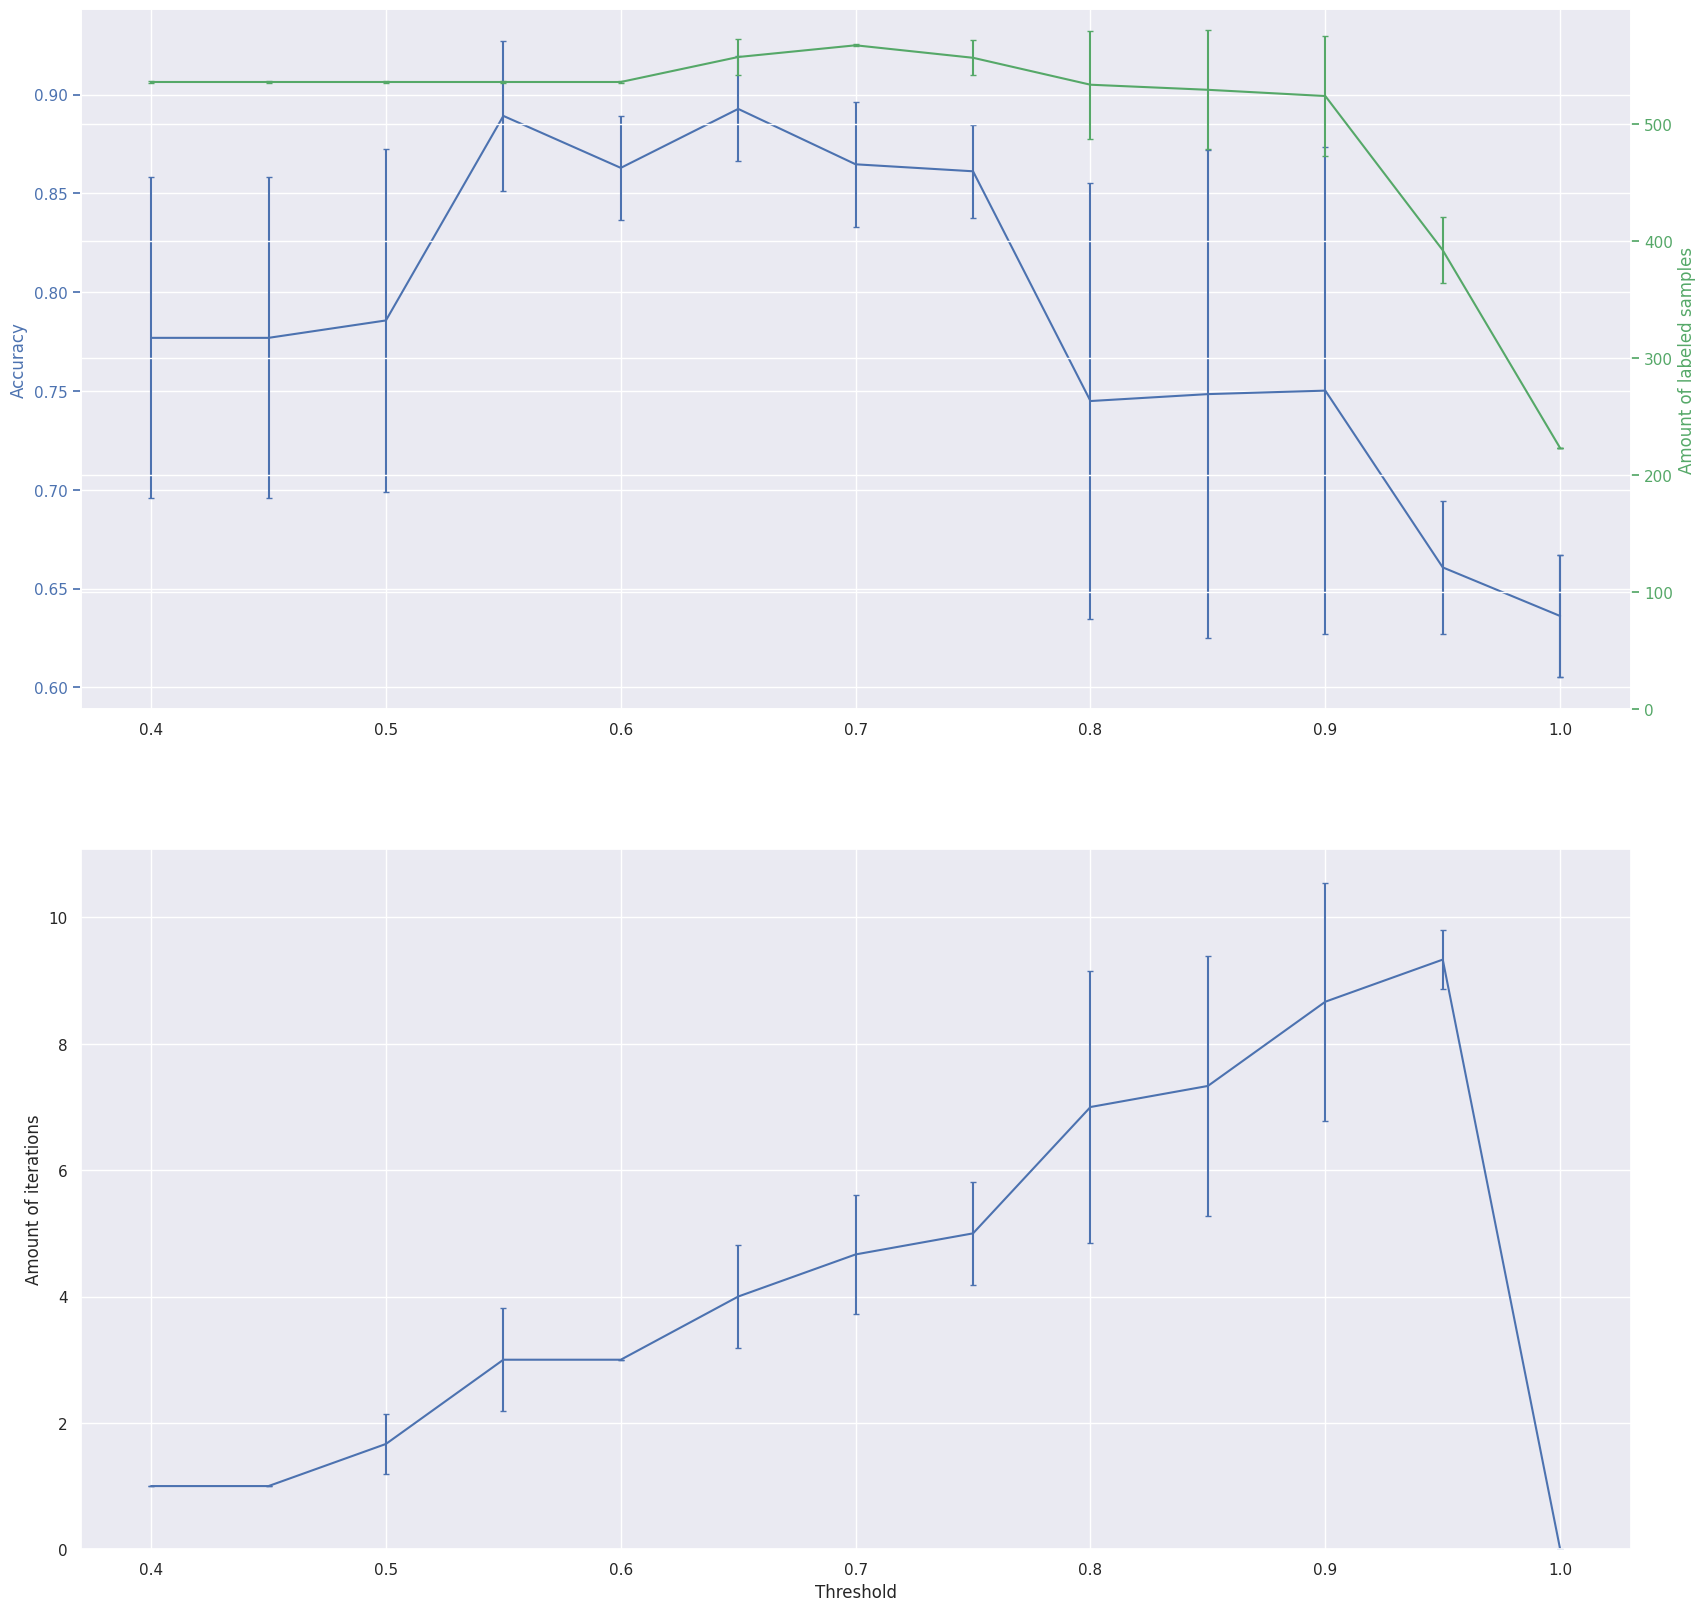

In [ ]:
"""
=============================================
Effect of varying threshold for self-training
=============================================

This example illustrates the effect of a varying threshold on self-training.
The `breast_cancer` dataset is loaded, and labels are deleted such that only 50
out of 569 samples have labels. A `SelfTrainingClassifier` is fitted on this
dataset, with varying thresholds.

The upper graph shows the amount of labeled samples that the classifier has
available by the end of fit, and the accuracy of the classifier. The lower
graph shows the last iteration in which a sample was labeled. All values are
cross validated with 3 folds.

At low thresholds (in [0.4, 0.5]), the classifier learns from samples that were
labeled with a low confidence. These low-confidence samples are likely have
incorrect predicted labels, and as a result, fitting on these incorrect labels
produces a poor accuracy. Note that the classifier labels almost all of the
samples, and only takes one iteration.

For very high thresholds (in [0.9, 1)) we observe that the classifier does not
augment its dataset (the amount of self-labeled samples is 0). As a result, the
accuracy achieved with a threshold of 0.9999 is the same as a normal supervised
classifier would achieve.

The optimal accuracy lies in between both of these extremes at a threshold of
around 0.7.

"""

# Authors: Oliver Rausch <rauscho@ethz.ch>
# License: BSD

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.semi_supervised import SelfTrainingClassifier
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle

n_splits = 3

X, y = datasets.load_breast_cancer(return_X_y=True)
X, y = shuffle(X, y, random_state=42)
y_true = y.copy()
y[50:] = -1
total_samples = y.shape[0]

base_classifier = SVC(probability=True, gamma=0.001, random_state=42)

x_values = np.arange(0.4, 1.05, 0.05)
x_values = np.append(x_values, 0.99999)
scores = np.empty((x_values.shape[0], n_splits))
amount_labeled = np.empty((x_values.shape[0], n_splits))
amount_iterations = np.empty((x_values.shape[0], n_splits))

for i, threshold in enumerate(x_values):
    self_training_clf = SelfTrainingClassifier(base_classifier, threshold=threshold)

    # We need manual cross validation so that we don't treat -1 as a separate
    # class when computing accuracy
    skfolds = StratifiedKFold(n_splits=n_splits)
    for fold, (train_index, test_index) in enumerate(skfolds.split(X, y)):
        X_train = X[train_index]
        y_train = y[train_index]
        X_test = X[test_index]
        y_test = y[test_index]
        y_test_true = y_true[test_index]

        self_training_clf.fit(X_train, y_train)

        # The amount of labeled samples that at the end of fitting
        amount_labeled[i, fold] = (
            total_samples
            - np.unique(self_training_clf.labeled_iter_, return_counts=True)[1][0]
        )
        # The last iteration the classifier labeled a sample in
        amount_iterations[i, fold] = np.max(self_training_clf.labeled_iter_)

        y_pred = self_training_clf.predict(X_test)
        scores[i, fold] = accuracy_score(y_test_true, y_pred)


ax1 = plt.subplot(211)
ax1.errorbar(
    x_values, scores.mean(axis=1), yerr=scores.std(axis=1), capsize=2, color="b"
)
ax1.set_ylabel("Accuracy", color="b")
ax1.tick_params("y", colors="b")

ax2 = ax1.twinx()
ax2.errorbar(
    x_values,
    amount_labeled.mean(axis=1),
    yerr=amount_labeled.std(axis=1),
    capsize=2,
    color="g",
)
ax2.set_ylim(bottom=0)
ax2.set_ylabel("Amount of labeled samples", color="g")
ax2.tick_params("y", colors="g")

ax3 = plt.subplot(212, sharex=ax1)
ax3.errorbar(
    x_values,
    amount_iterations.mean(axis=1),
    yerr=amount_iterations.std(axis=1),
    capsize=2,
    color="b",
)
ax3.set_ylim(bottom=0)
ax3.set_ylabel("Amount of iterations")
ax3.set_xlabel("Threshold")

plt.show()
